In [28]:
import os
from matplotlib import pyplot as plt

In [29]:
stats_folder = "./stats"
stats_programs = os.listdir(stats_folder)
program_folders = [os.path.join(stats_folder, stats_program) for stats_program in stats_programs]

In [65]:
def get_matching_lines(filename, search_string):
    """
    Gets the lines in a file that contain the specified search string.

    Parameters:
    - filename: The path to the file to search.
    - search_string: The string to search for in the file.

    Returns:
    - A list of lines that contain the search string.
    """
    matching_lines = []

    try:
        with open(filename, 'r') as file:
            for line in file:
                if search_string in line:
                    matching_lines.append(line.rstrip())  # Remove trailing newline characters
    except FileNotFoundError:
        print(f"The file '{filename}' does not exist.")
    except Exception as e:
        print(f"An error occurred: {e}")

    return matching_lines

def print_stats(stats_program: str, limit: int=1000):
    program_folder = os.path.join(stats_folder, stats_program)
    index = 0
    num_pages_accessed_last_epoch_list = []
    total_active_pages_list = []
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    while (True):
        stats_file_name = "stats-{}.out".format(index)
        stats_file_path = os.path.join(program_folder, stats_file_name)
        if os.path.exists(stats_file_path) and index != limit:
            num_pages_accessed_last_epoch = int(get_matching_lines(stats_file_path, "num_pages_accessed_last_epoch")[0].split()[2].split(".")[0])
            total_active_pages = int(get_matching_lines(stats_file_path, "total_active_pages")[0].split()[2].split(".")[0])
            
            num_pages_accessed_last_epoch_list.append(num_pages_accessed_last_epoch)
            total_active_pages_list.append(total_active_pages)
            index += 1
        else:
            print(stats_file_path, "Does not exist")
            break
    
    x = list(range(len(num_pages_accessed_last_epoch_list)))
    ax1.plot(x, num_pages_accessed_last_epoch_list, marker='', color="blue")
    ax1.set_title(stats_program)
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('num_pages_accessed_last_epoch')
    ax1.set_ylim(0, 10)
    
    # ax2.plot(x, total_active_pages_list)
    
    ax2.plot(x, total_active_pages_list, marker='', color="orange")
    ax2.set_title(stats_program)
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('total_active_pages')
    ax2.set_ylim(0, max(total_active_pages_list)+10)
        
        

./stats/pagerank_baseline/stats-1300.out Does not exist


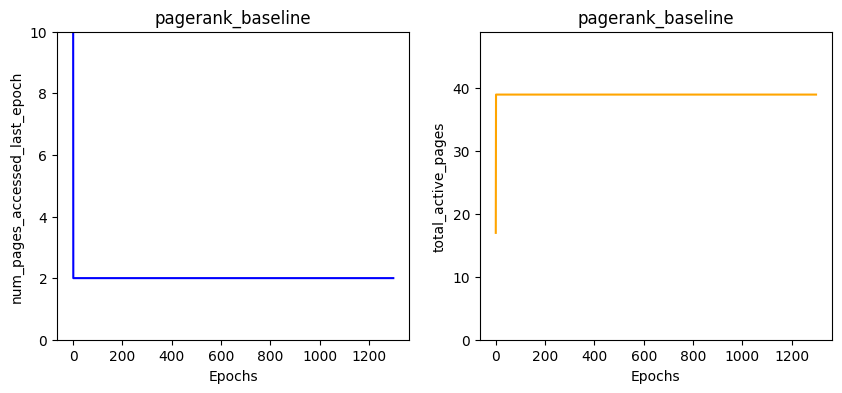

In [66]:
print_stats("pagerank_baseline", 999999999999999999999999)

./stats/rbm_baseline/stats-1148.out Does not exist


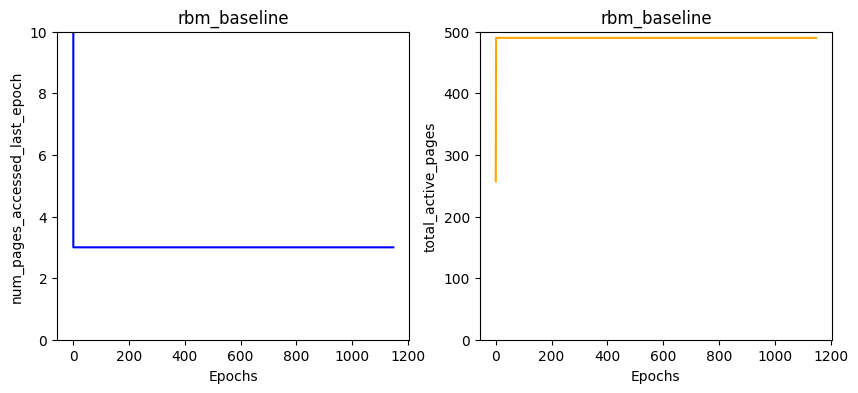

In [67]:
print_stats("rbm_baseline", 999999999999999999999999)

./stats/lud_baseline/stats-1103.out Does not exist


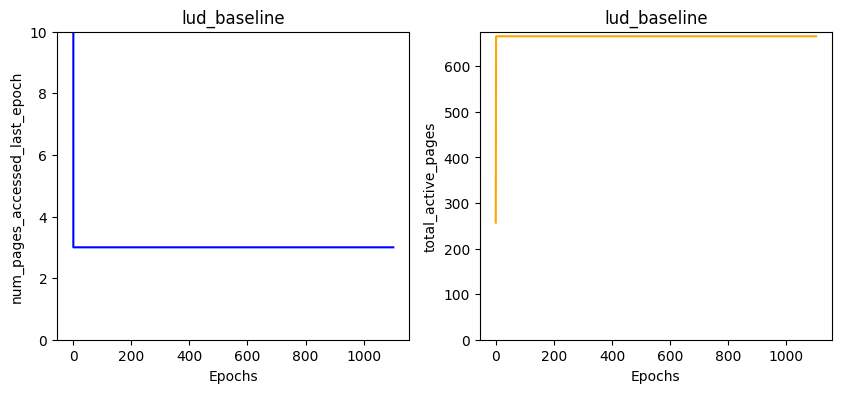

In [68]:
print_stats("lud_baseline", 999999999999999999999999)

./stats/spmv_baseline/stats-1151.out Does not exist


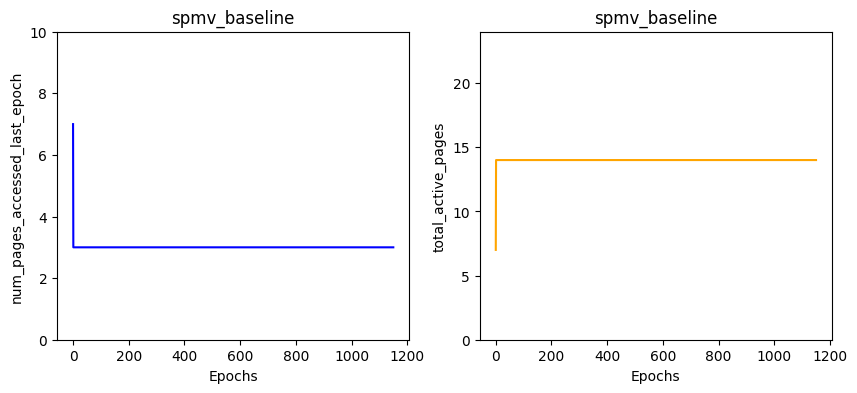

In [69]:
print_stats("spmv_baseline", 999999999999999999999999)